In [19]:
import numpy as np
import pandas as pd

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
file_path = '/content/drive/MyDrive/Sentiment/D1.csv'  #file path
df = pd.read_csv(file_path, encoding='utf-8') # Read the CSV file into a DataFrame


In [22]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [23]:
df.tail()

,text,label
39995,"""Western Union"" is something of a forgotten cl...",1
39996,This movie is an incredible piece of work. It ...,1
39997,My wife and I watched this movie because we pl...,0
39998,"When I first watched Flatliners, I was amazed....",1
39999,"Why would this film be so good, but only gross...",1


In [24]:
df.columns

Index(['text', 'label'], dtype='object')

In [25]:
df.columns=['review','sentiment']

In [26]:
df.columns

Index(['review', 'sentiment'], dtype='object')

In [27]:
# Define the custom labels
positive = 'Positive'
negative = 'Negative'

# Replace values in the 'sentiment' column with custom labels
df['sentiment'] = df['sentiment'].replace({1: positive, 0: negative})

In [28]:
df.shape

(40000, 2)

In [29]:
df

,review,sentiment
0,I grew up (b. 1965) watching and loving the Th...,Negative
1,"When I put this movie in my DVD player, and sa...",Negative
2,Why do people who do not know what a particula...,Negative
3,Even though I have great interest in Biblical ...,Negative
4,Im a die hard Dads Army fan and nothing will e...,Positive
...,...,...
39995,"""Western Union"" is something of a forgotten cl...",Positive
39996,This movie is an incredible piece of work. It ...,Positive
39997,My wife and I watched this movie because we pl...,Negative
39998,"When I first watched Flatliners, I was amazed....",Positive


In [30]:
df.isnull().any()

review       False
sentiment    False
dtype: bool

In [31]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [32]:
df.describe()

,review,sentiment
count,40000,40000
unique,39723,2
top,"Hilarious, clean, light-hearted, and quote-wor...",Negative
freq,4,20019


In [33]:
df['sentiment'].value_counts()

Negative    20019
Positive    19981
Name: sentiment, dtype: int64

Training


In [34]:
# Import data science libraries
import matplotlib.pyplot as plt #creating graphs
import seaborn as sns #data visualisation
# import nltk #natural language tool kit used for tokenization, stemming, lemmatization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer #used to convert labels into binary format
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords  #used for removing stop words
from nltk.stem import PorterStemmer #used for stemming words
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer  #Lemmatization is a text preprocessing technique that reduces words to their base or dictionary form.
from nltk.tokenize import word_tokenize, sent_tokenize #These functions are used for tokenizing text into words and sentences, respectively.

In [35]:
!pip install toktok #The toktok library is a Python library for tokenizing text into words.

  Preparing metadata (setup.py) ... done
  Created wheel for toktok: filename=toktok-0.0.2-py3-none-any.whl size=4241 sha256=f4e318190c2ed596406f3faf79589ed6d5f1811b48402617cca4fcd7b3f346eb
  Stored in directory: /root/.cache/pip/wheels/ba/af/b7/4d2a15cdf2dc37ac44fb90376822fd55b6e41c536ec5d9e4b6
Successfully built toktok


In [36]:
import spacy # Import the spacy library, used for NLP tasks
import re # Import the re module for working with regular expressions
import string # Import the string module for string-related operations
import unicodedata  # Import the unicodedata module for working with Unicode characters
import nltk # Import the NLTK library for natural language processing
from nltk.tokenize import word_tokenize, sent_tokenize # Import functions for tokenizing text
from nltk.stem import LancasterStemmer, WordNetLemmatizer # Import classes for word stemming and lemmatization
from sklearn.linear_model import LogisticRegression, SGDClassifier # Import machine learning models for classification
from sklearn.naive_bayes import MultinomialNB # Import the Multinomial Naive Bayes classifier
from sklearn.svm import SVC # Import the Support Vector Machine (SVM) classifier
from textblob import TextBlob # Import the TextBlob library for NLP tasks
from textblob import Word # Import the Word class from TextBlob
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix # Import metrics for evaluating machine learning models
from bs4 import BeautifulSoup # Import BeautifulSoup for web scraping and parsing HTML/XML


In [37]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [38]:
from nltk.corpus.reader.tagged import ToktokTokenizer
tokenizers = ToktokTokenizer()
stopwords = nltk.corpus.stopwords.words('english')

In [39]:
def noiseremovel_text(text):
  soup = BeautifulSoup(text, "html.parser")
  text = soup.get_text()
  text = re.sub('\[[^]]*\]', '',text)
  return text

In [40]:
df['review'] = df['review'].apply(noiseremovel_text)

<ipython-input-39-f7deec95ba3d>:2: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [41]:
df.head()

,review,sentiment
0,I grew up (b. 1965) watching and loving the Th...,Negative
1,"When I put this movie in my DVD player, and sa...",Negative
2,Why do people who do not know what a particula...,Negative
3,Even though I have great interest in Biblical ...,Negative
4,Im a die hard Dads Army fan and nothing will e...,Positive


In [42]:
def stemmer(text):
  ps = nltk.porter.PorterStemmer()
  text = '.'.join([ps.stem(word) for word in text.split()])
  return text

In [43]:
df['review'] = df['review'].apply(stemmer)

In [44]:
df.head()

,review,sentiment
0,i.grew.up.(b..1965).watch.and.love.the.thunder...,Negative
1,"when.i.put.thi.movi.in.my.dvd.player,.and.sat....",Negative
2,whi.do.peopl.who.do.not.know.what.a.particular...,Negative
3,even.though.i.have.great.interest.in.biblic.mo...,Negative
4,im.a.die.hard.dad.armi.fan.and.noth.will.ever....,Positive


In [45]:
import pandas as pd
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import ToktokTokenizer

# Assuming you have a DataFrame named 'df' with a column 'review'

# Download the necessary data
nltk.download('punkt')
nltk.download('stopwords')

# Function to remove stopwords from text
def remove_stopwords(text, stop_words=None, is_lower_case=False):
    # Create a ToktokTokenizer instance
    tokenizers = ToktokTokenizer()

    # Use a regular expression to split the text into words while preserving consecutive full-stop signs
    words = re.findall(r'\w+|\.\.+', text)

    # Remove stopwords
    if stop_words is None:
        stop_words = set()
    else:
        stop_words = set(stop_words)

    if is_lower_case:
        # Remove stopwords without converting tokens to lowercase
        filtokens = [i for i in words if i not in stop_words]
    else:
        # Remove stopwords after converting tokens to lowercase
        filtokens = [i for i in words if i.lower() not in stop_words]

    # Join the filtered words back into a sentence
    filtered_text = ' '.join(filtokens)
    return filtered_text

# Now, apply the remove_stopwords function to the 'review' column of the DataFrame

# Get the English stopwords
stop_wr = set(stopwords.words('english'))

# Apply the remove_stopwords function to the 'review' column of the DataFrame
df['review'] = df['review'].apply(remove_stopwords, stop_words=stop_wr)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
df.head()

,review,sentiment
0,grew b .. 1965 watch love thunderbirds .. mate...,Negative
1,put thi movi dvd player sat coke chips expecta...,Negative
2,whi peopl know particular time past wa like fe...,Negative
3,even though great interest biblic movies wa bo...,Negative
4,im die hard dad armi fan noth ever chang .. go...,Positive


In [47]:
X = df.review[:30000]

In [48]:
y = df.review[30000:]

In [49]:
cv = CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
cv_train = cv.fit_transform(X)
cv_test = cv.fit_transform(y)
print('Bow_cv_train',cv_train.shape)
print('Bow_cv_test',cv_test.shape)

Bow_cv_train (30000, 4867861)
Bow_cv_test (10000, 1846212)


In [50]:
tf = TfidfVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))
tf_train = tf.fit_transform(X)
tf_test = tf.fit_transform(y)
print('Bow_tf_train',tf_train.shape)
print('Bow_tf_test',tf_test.shape)

Bow_tf_train (30000, 4867861)
Bow_tf_test (10000, 1846212)


In [51]:
# Create a LabelBinarizer instance
label_binarizer = LabelBinarizer()

# Fit and transform the 'sentiment' column
sentiment_encoded = label_binarizer.fit_transform(df['sentiment'])
print(sentiment_encoded.shape)

(40000, 1)


In [52]:
sentiment_encoded

array([[0],
       [0],
       [0],
       ...,
       [0],
       [1],
       [1]])

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Convert the text data to bag-of-words features
X_bow = vectorizer.fit_transform(df['review'])

# Split the data into features (X) and target (y)
X_train, X_test, y_train, y_test = train_test_split(X_bow, df['sentiment'], test_size=0.2, random_state=42)

# Initialize the Logistic Regression model
logistic = LogisticRegression(penalty='l2', max_iter=500, C=1, random_state=42)

# Fitting the model on the training data
lr_bow = logistic.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_bow.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8785
Classification Report:
              precision    recall  f1-score   support

    Negative       0.88      0.87      0.88      3966
    Positive       0.88      0.88      0.88      4034

    accuracy                           0.88      8000
   macro avg       0.88      0.88      0.88      8000
weighted avg       0.88      0.88      0.88      8000



In [54]:
# Make predictions on new text data
new_text = ['this movie is bad']
new_text_bow = vectorizer.transform(new_text)
y_pred = lr_bow.predict(new_text_bow)

print("Predicted Sentiment:", y_pred[0])

Predicted Sentiment: Negative


Output For Our File


In [55]:
file_path = '//content/drive/MyDrive/Sentiment/test data.csv'  #file path
df1= pd.read_csv(file_path, encoding='utf-8') # Read the CSV file into a DataFrame


In [56]:
df1.head()

,Comments,CleanedComments
0,i hope no one gives jack shit for choosing wro...,hope one gives jack shit choosing wrong choice...
1,this reminded me a lot of firewatch! one of my...,reminded lot firewatch one favorite games
2,Why wasn&#39;t there a red X over Jason&#39;s ...,wasnt red x jasons photo end got face cut didnt
3,Laugh,laugh
4,&quot;night air = death&quot; agreed my asthma...,quotnight air deathquot agreed asthmatic brother


In [57]:
df1.columns

Index(['Comments ', 'CleanedComments'], dtype='object')

In [58]:


# Define the file path
file_path = '//content/drive/MyDrive/Sentiment/test data.csv'

# Read the CSV file into a DataFrame
df1 = pd.read_csv(file_path, encoding='utf-8')

# Drop the 'Comments' column
df1.drop('Comments ', axis=1, inplace=True)  # Make sure the column name matches exactly

# Save the modified DataFrame to a new CSV file
new_file_path = '//content/drive/MyDrive/Sentiment/final_data_without_comments.csv'
df1.to_csv(new_file_path, index=False)

print("File saved successfully to:", new_file_path)


File saved successfully to: //content/drive/MyDrive/Sentiment/final_data_without_comments.csv


In [59]:
df1.head()

,CleanedComments
0,hope one gives jack shit choosing wrong choice...
1,reminded lot firewatch one favorite games
2,wasnt red x jasons photo end got face cut didnt
3,laugh
4,quotnight air deathquot agreed asthmatic brother


In [60]:


# Read the CSV file into a DataFrame
df = pd.read_csv('//content/drive/MyDrive/Sentiment/final_data_without_comments.csv')

# Assuming the column containing the text data is named 'text' (change this to match your column name)
df['CleanedComments'].fillna('', inplace=True)  # Handle any NaN values
text_bow = vectorizer.transform(df['CleanedComments'])

# Make predictions
y_pred = lr_bow.predict(text_bow)

# Add predictions back to DataFrame (optional)
df['predicted_sentiment'] = y_pred

# Optional: Save the DataFrame with predictions to a new CSV file
df.to_csv('predictions.csv', index=False)

# Optional: Print the DataFrame to see the predictions
print(df)


                                        CleanedComments predicted_sentiment
0     hope one gives jack shit choosing wrong choice...            Positive
1             reminded lot firewatch one favorite games            Negative
2       wasnt red x jasons photo end got face cut didnt            Negative
3                                                 laugh            Positive
4      quotnight air deathquot agreed asthmatic brother            Negative
...                                                 ...                 ...
2319                                                               Positive
2320                                               love            Positive
2321                                               hype            Negative
2322                       congrats first take pat back            Positive
2323                                              first            Positive

[2324 rows x 2 columns]


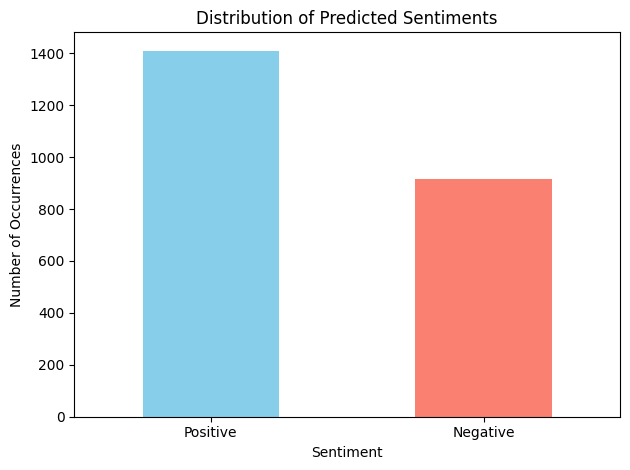

In [61]:


# Read the CSV file into a DataFrame
df = pd.read_csv('predictions.csv')

# Count occurrences of each sentiment
sentiment_counts = df['predicted_sentiment'].value_counts()

# Plotting
sentiment_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribution of Predicted Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=0)  # Making sure x-tick labels are horizontally aligned
plt.tight_layout()  # Adjust layout for better visualization
plt.show()
